Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

Load Datasets

In [2]:
train_df = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Credit Card Fraud\fraudTrain.csv")
test_df = pd.read_csv(r"D:\Ashraf\Internship\CODSOFT\Dataset\Credit Card Fraud\fraudTest.csv")

In [3]:
train_df.iloc[:, :10].head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest


In [4]:
train_df.iloc[:, 10:20].head()

,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time
0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018
1,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044
2,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051
3,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076
4,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186


In [5]:
train_df.iloc[:, 20:30].head()

,merch_lat,merch_long,is_fraud
0,36.011293,-82.048315,0
1,49.159047,-118.186462,0
2,43.150704,-112.154481,0
3,47.034331,-112.561071,0
4,38.674999,-78.632459,0


In [6]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data Preprocessing

Drop irrelevant columns

In [7]:
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num']

train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  unix_time              1296675 non-null  int64  
 14  merch_lat         

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   merchant               555719 non-null  object 
 2   category               555719 non-null  object 
 3   amt                    555719 non-null  float64
 4   gender                 555719 non-null  object 
 5   city                   555719 non-null  object 
 6   state                  555719 non-null  object 
 7   zip                    555719 non-null  int64  
 8   lat                    555719 non-null  float64
 9   long                   555719 non-null  float64
 10  city_pop               555719 non-null  int64  
 11  job                    555719 non-null  object 
 12  dob                    555719 non-null  object 
 13  unix_time              555719 non-null  int64  
 14  merch_lat              555719 non-nu

In [10]:
train_df.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
test_df.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Check for missing values

In [12]:
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

Missing Values in Training Data:
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [13]:
print("Missing Values in Testing Data:")
print(test_df.isnull().sum())

Missing Values in Testing Data:
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [14]:
# Drop irrelevant columns
irrelevant_columns = ['unix_time', 'zip']
train_df.drop(columns=irrelevant_columns, inplace=True)
test_df.drop(columns=irrelevant_columns, inplace=True)

Convert 'trans_date_trans_time' and 'dob' to datetime Format and extract features

In [15]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

train_df['transaction_hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['transaction_hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['transaction_day'] = train_df['trans_date_trans_time'].dt.dayofweek
test_df['transaction_day'] = test_df['trans_date_trans_time'].dt.dayofweek

In [16]:
train_df['dob'] = pd.to_datetime(train_df['dob'], errors='coerce')
test_df['dob'] = pd.to_datetime(test_df['dob'], errors='coerce')

current_year = pd.Timestamp.now().year
train_df['age'] = current_year - train_df['dob'].dt.year
test_df['age'] = current_year - test_df['dob'].dt.year

Drop the original datetime columns after feature extraction

In [17]:
train_df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)
test_df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

In [18]:
print("Updated Training Data:")
train_df.head()

Updated Training Data:


,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,36
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,46
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1,62
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1,57
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1,38


In [19]:
print("Updated Testing Data:")
test_df.head()

Updated Testing Data:


,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,6,56
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,6,34
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,6,54
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,6,37
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,6,69


Check for outliers

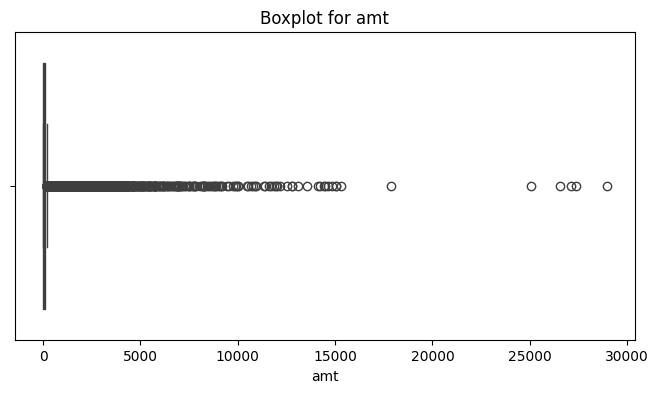

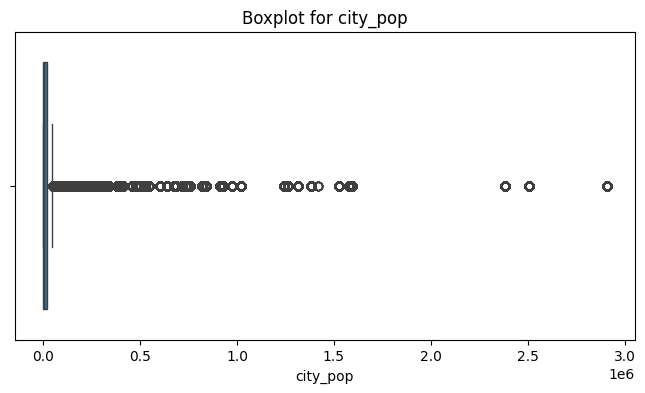

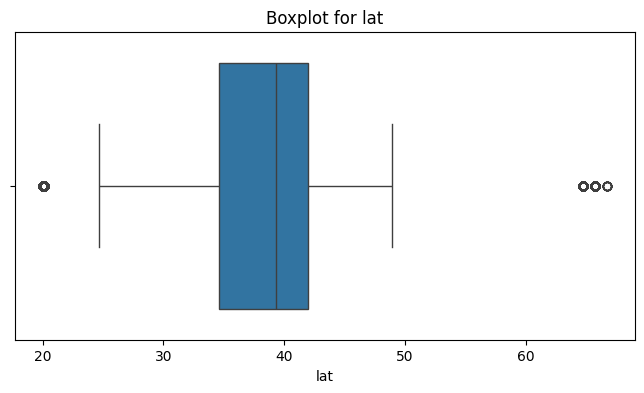

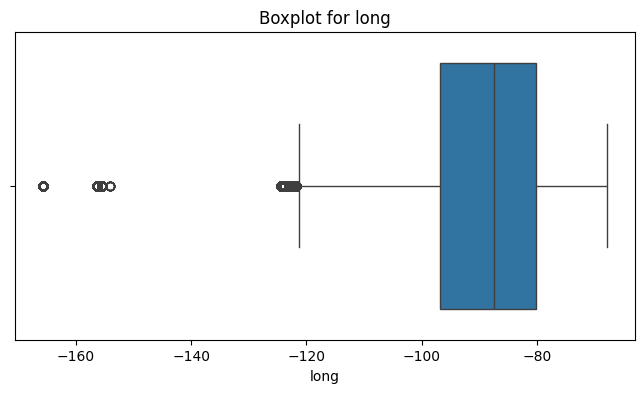

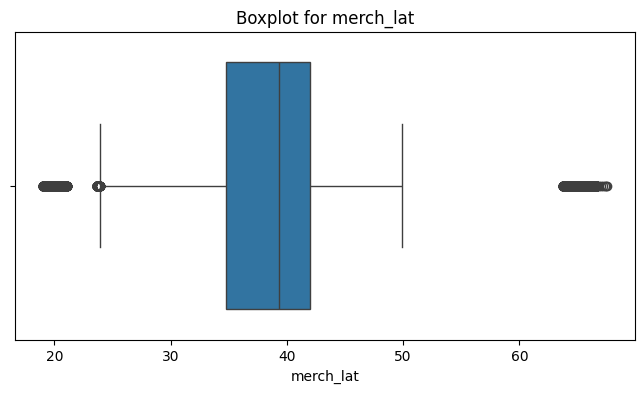

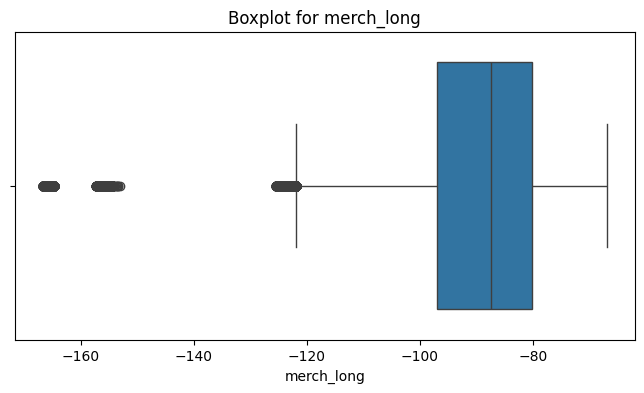

In [20]:
numerical_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.xlabel(feature)
    plt.show()

Detect outliers

In [21]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_amt = detect_outliers(train_df, 'amt')
print(f"Number of outliers in 'amt': {len(outliers_amt)}")

outliers_city_pop = detect_outliers(train_df, 'city_pop')
print(f"Number of outliers in 'city_pop': {len(outliers_city_pop)}")

Number of outliers in 'amt': 67290
Number of outliers in 'city_pop': 242674


Cap outliers using the IQR method

In [22]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

columns_to_cap = ['amt', 'city_pop']
for col in columns_to_cap:
    cap_outliers(train_df, col)
    cap_outliers(test_df, col)

Check outliers after capping

In [23]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

for feature in ['amt', 'city_pop']:
    outliers_count = count_outliers(train_df, feature)
    print(f"Remaining outliers in '{feature}': {outliers_count}")

Remaining outliers in 'amt': 0
Remaining outliers in 'city_pop': 0


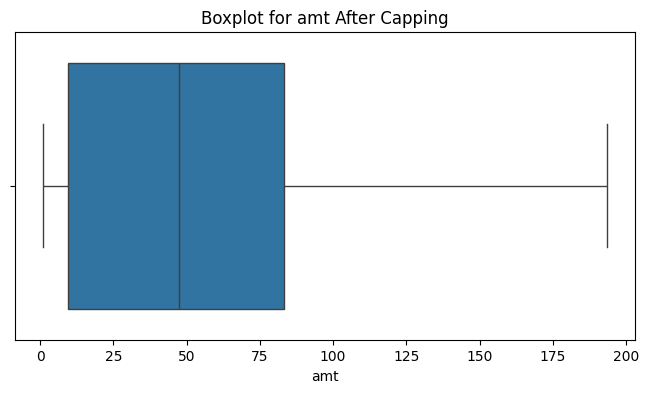

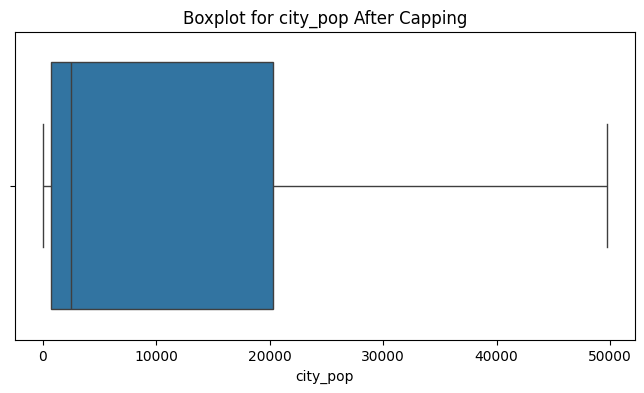

In [24]:
for feature in ['amt', 'city_pop']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature} After Capping")
    plt.xlabel(feature)
    plt.show()

Encode categorical variables

In [25]:
categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']

train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns]

print("Categorical encoding completed.")
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

Categorical encoding completed.
Training data shape: (1296675, 2152)
Testing data shape: (555719, 2152)


Scale numerical features

In [26]:
numerical_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

scaler = StandardScaler()

train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

print("Numerical scaling completed.")
print(f"First few rows of scaled numerical features:\n{train_df[numerical_features].head()}")

Numerical scaling completed.
First few rows of scaled numerical features:
        amt  city_pop       lat      long  merch_lat  merch_long
0 -0.995503 -0.525547 -0.484420  0.657620  -0.494354    0.593864
1  0.928902 -0.700172  2.039120 -2.033870   2.078699   -2.030341
2  2.550043 -0.491155  0.717754 -1.601537   0.902849   -1.592323
3 -0.242189 -0.606753  1.515617 -1.590766   1.662886   -1.621848
4 -0.299398 -0.702781 -0.023035  0.782279   0.026941    0.841909


# Exploratory Data Analysis

Distribution of Target Variable

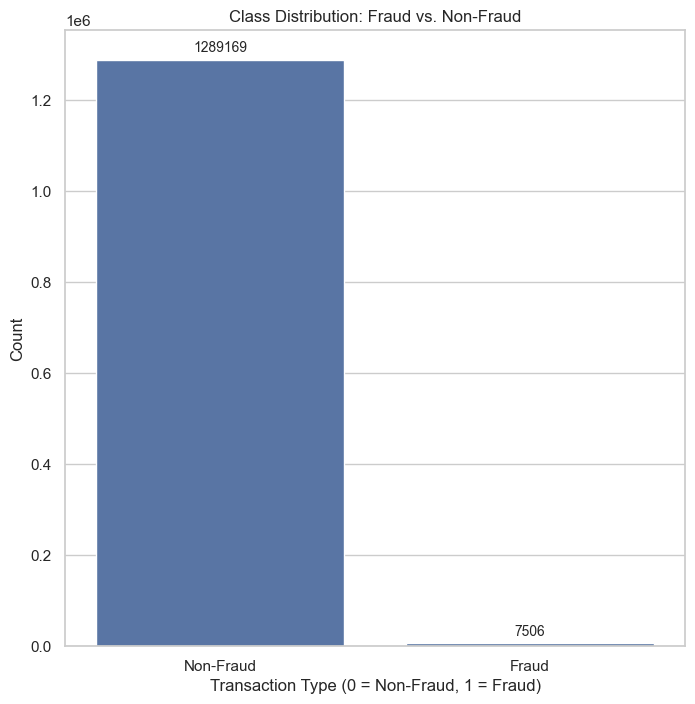

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 8))
ax = sns.countplot(x='is_fraud', data=train_df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.title("Class Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Transaction Type (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

Transaction Amount Distribution by Fraud

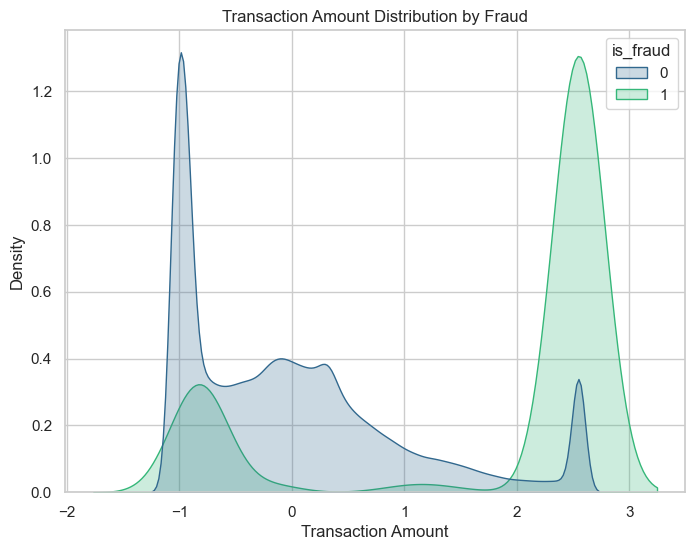

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df, x='amt', hue='is_fraud', fill=True, common_norm=False, palette='viridis')
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

Fraud Count by Transaction Hour

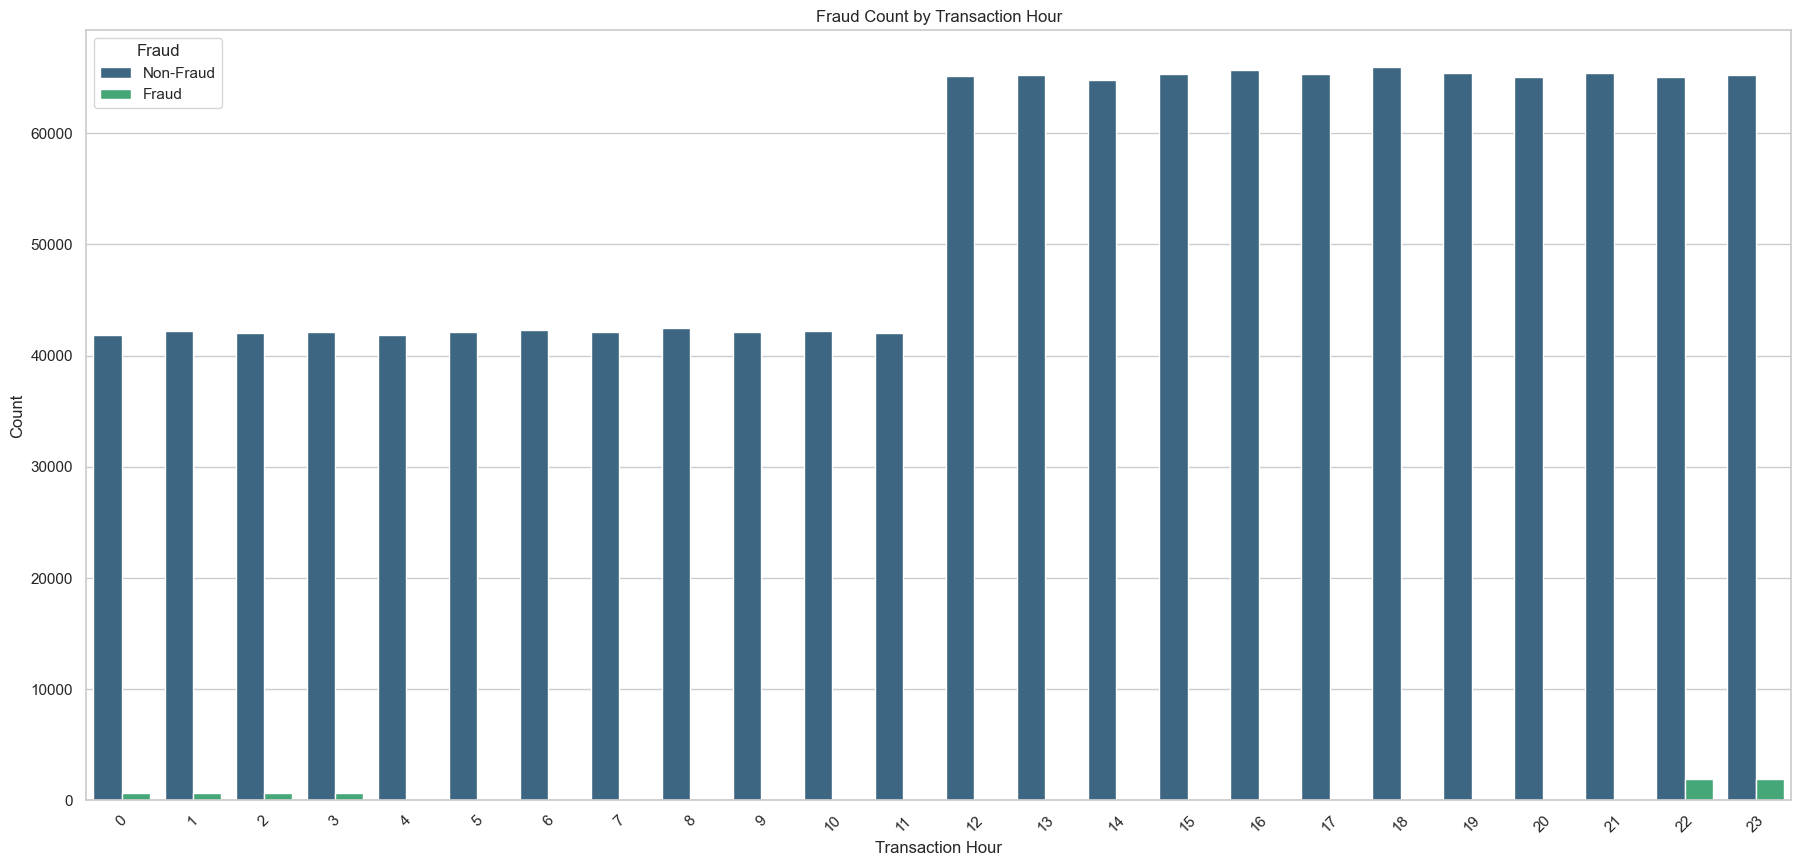

In [29]:
plt.figure(figsize=(22, 10))
ax = sns.countplot(x='transaction_hour', hue='is_fraud', data=train_df, palette='viridis')
plt.title("Fraud Count by Transaction Hour")
plt.xlabel("Transaction Hour")
plt.ylabel("Count")
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

Fraud Count by Transaction Day

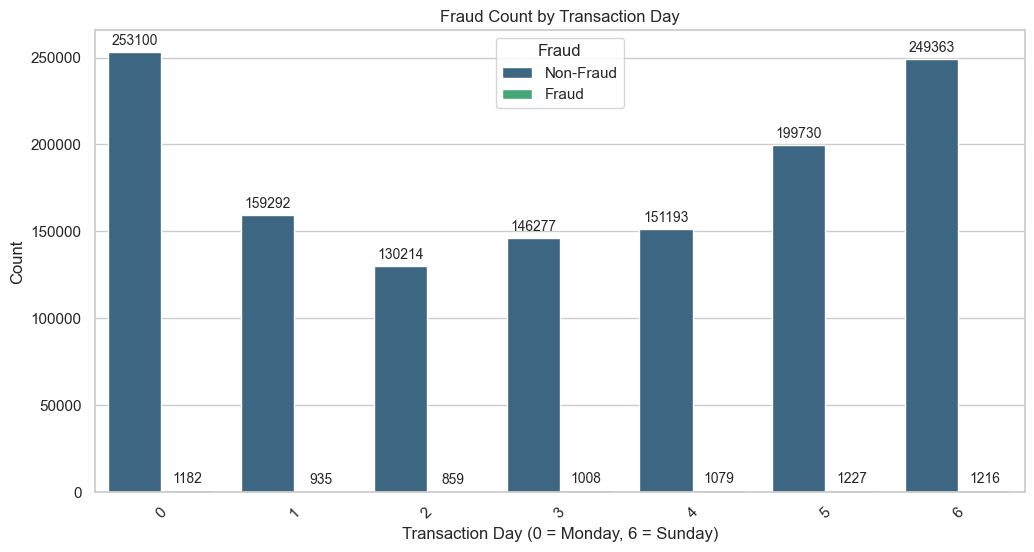

In [30]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='transaction_day', hue='is_fraud', data=train_df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.title("Fraud Count by Transaction Day")
plt.xlabel("Transaction Day (0 = Monday, 6 = Sunday)")
plt.ylabel("Count")
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

Transaction Amount Distribution by Fraud

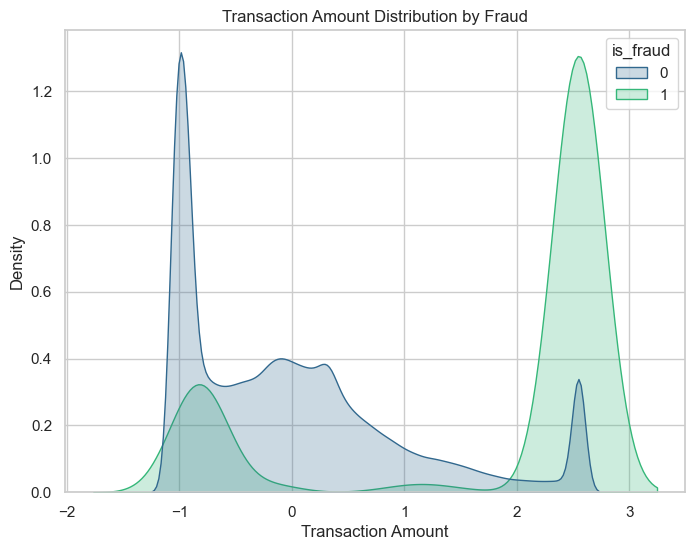

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df, x='amt', hue='is_fraud', fill=True, palette='viridis', common_norm=False)
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

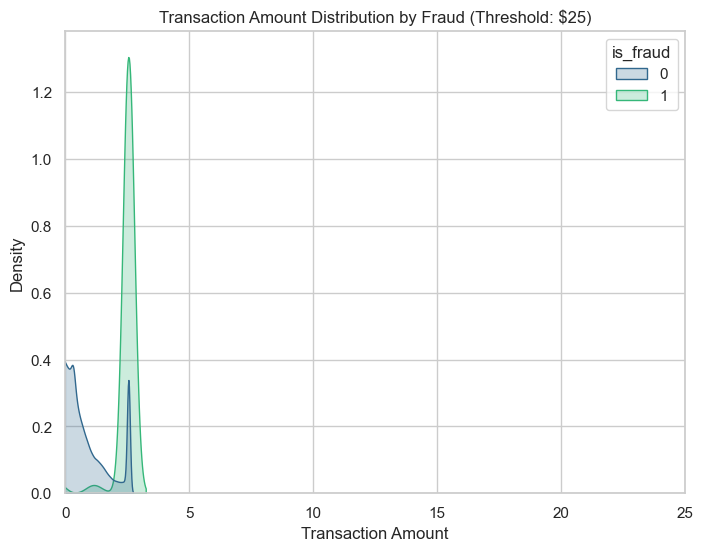

In [32]:
filtered_data = train_df[train_df['amt'] <= 25]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=filtered_data, x='amt', hue='is_fraud', fill=True, palette='viridis', common_norm=False)
plt.title("Transaction Amount Distribution by Fraud (Threshold: $25)")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.xlim(0, 25)
plt.show()

Age Distribution by Fraud

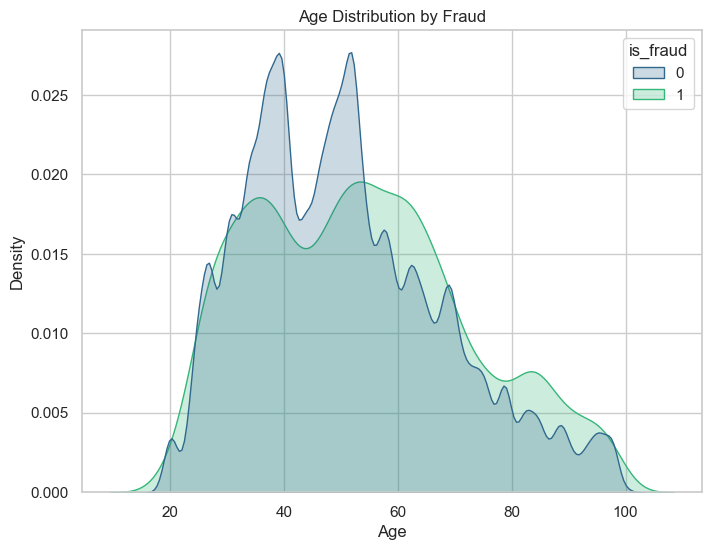

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df, x='age', hue='is_fraud', fill=True, palette='viridis', common_norm=False)
plt.title("Age Distribution by Fraud")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

City Population Distribution by Fraud

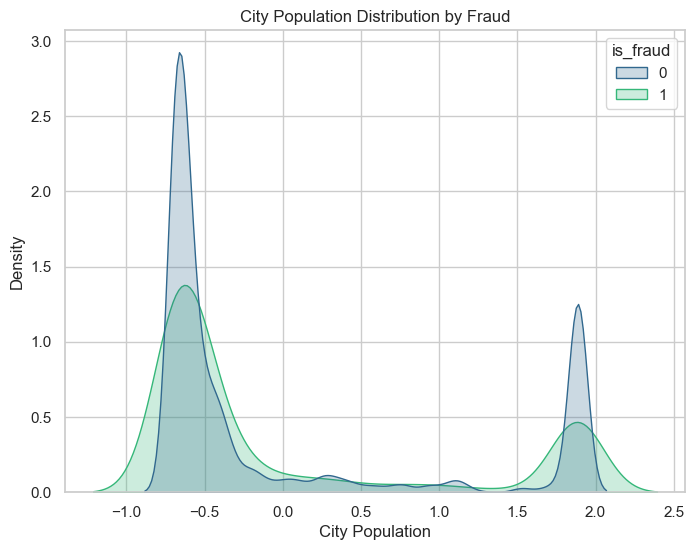

In [34]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df, x='city_pop', hue='is_fraud', fill=True, palette='viridis', common_norm=False)
plt.title("City Population Distribution by Fraud")
plt.xlabel("City Population")
plt.ylabel("Density")
plt.show()

Fraud by Geographic Location

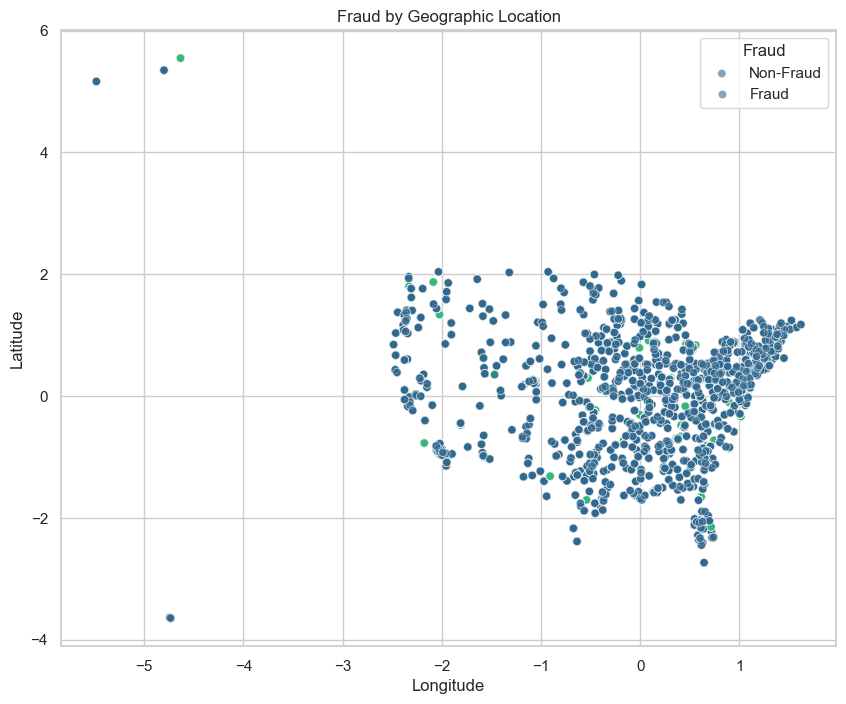

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df, x='long', y='lat', hue='is_fraud', alpha=0.6, palette='viridis')
plt.title("Fraud by Geographic Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

In [36]:
train_df.shape

(1296675, 2152)

Balance the target variable

In [38]:
X = train_df.drop('is_fraud', axis=1)
y = train_df['is_fraud']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 7506, 1: 7506})


# Model Training

Split the into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (12009, 2151), (12009,)
Test set shape: (3003, 2151), (3003,)


Train Random Forest model

In [40]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Random Forest

In [41]:
y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9540
Precision: 0.9552
Recall: 0.9527
F1-Score: 0.9540


In [42]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1502
           1       0.96      0.95      0.95      1501

    accuracy                           0.95      3003
   macro avg       0.95      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003



In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[1435   67]
 [  71 1430]]


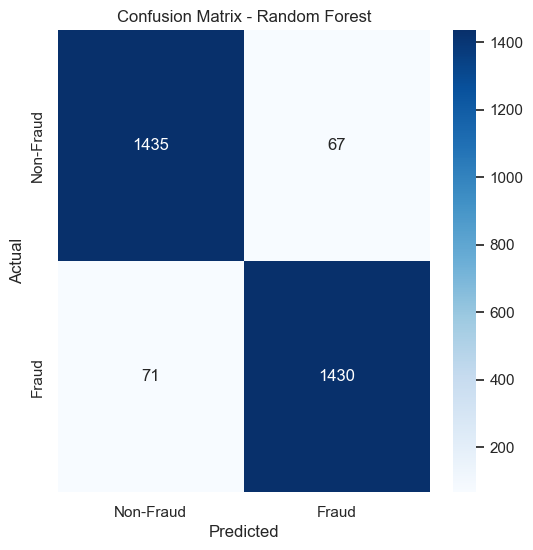

In [44]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

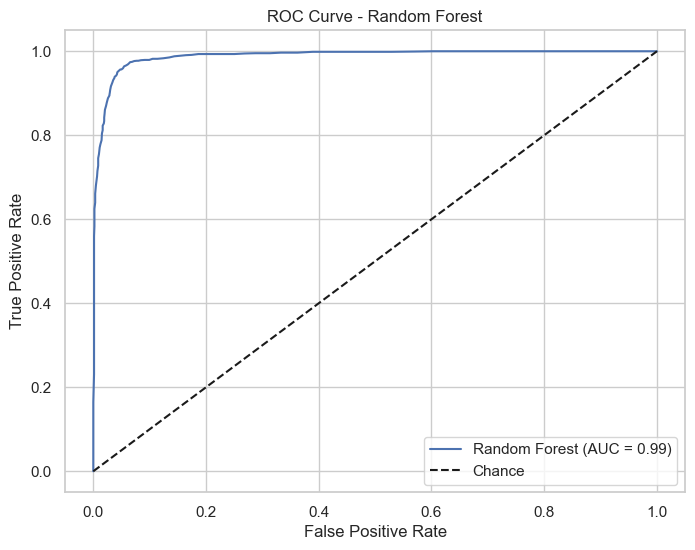

In [45]:
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_rf)))
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

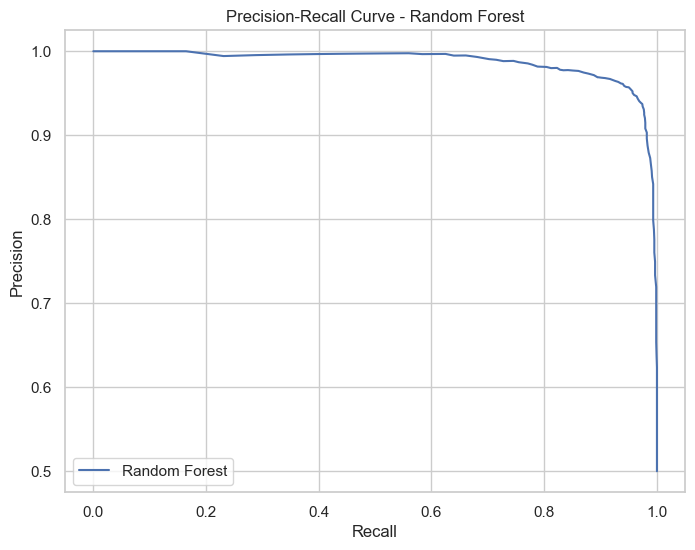

In [46]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.title("Precision-Recall Curve - Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

XGBoost

In [47]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Evaluate XGBoost

In [48]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred_xgb)
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred_xgb)
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred_xgb)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9690
Precision: 0.9625
Recall: 0.9760
F1-Score: 0.9692


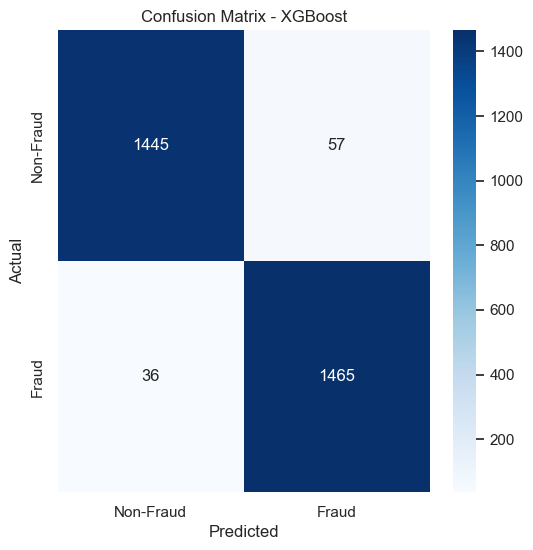

In [49]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

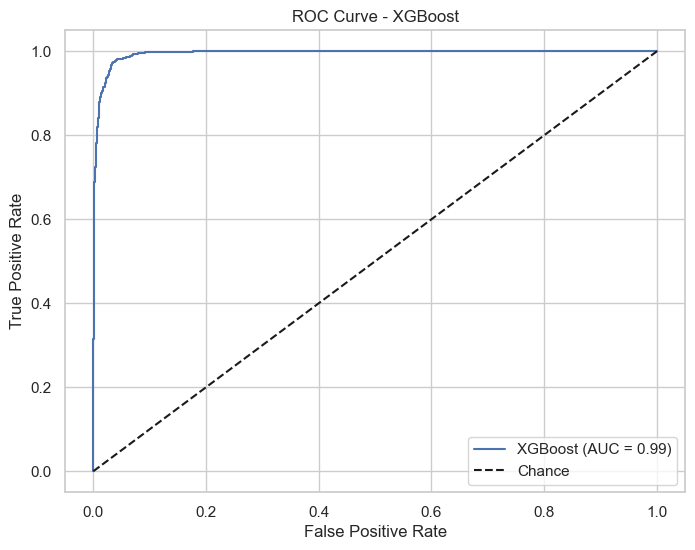

In [50]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

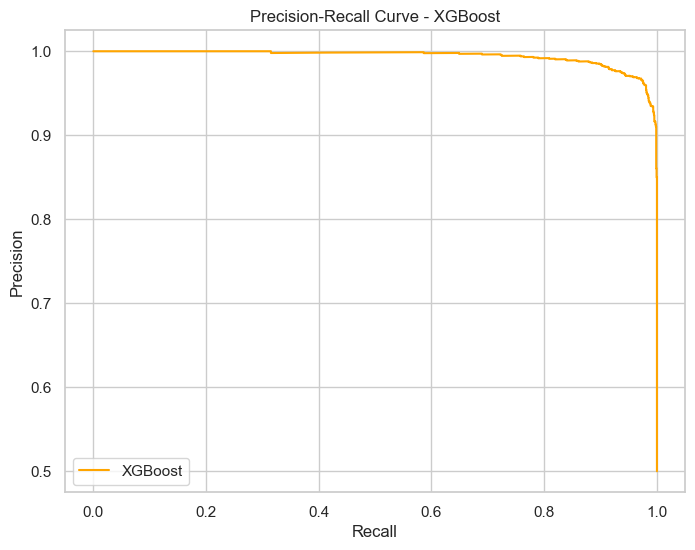

In [51]:
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label="XGBoost", color='orange')
plt.title("Precision-Recall Curve - XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()